<a href="https://colab.research.google.com/github/AminaZahid/Urdu-Text-Sentiment-Analysis--CNN-BiLSTM/blob/main/UTSA_(CNN%2C_Bi_LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Replace 'your_dataset.csv' with the actual path to your CSV file
file_path = '/content/drive/MyDrive/UTSA-Dataset-Updated.xlsx'

# Read the CSV file into a pandas DataFrame
df = pd.read_excel(file_path)

# Print the first few rows of the DataFrame to verify the data
df.head()


,text,label
0,بھنڈی بنائی تھی بہت اچھی بنی تھ,pos
1,آہاں نائس بارکان ویسے اس موسم میں بھنڈی,pos
2,سوری ہمارے لیے موسم کوئی معنے رکھتے لوکیشن اہم...,neu
3,چکن کڑاہی,neu
4,ہاں تو بنا کے ہی کھائی نا,neu


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data Preprocessing Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


# Model Evaluation Libraries
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import os

In [ ]:
!pip install urduhack

In [ ]:
import urduhack
urduhack.download()
from urduhack.normalization import normalize
from urduhack.preprocessing import normalize_whitespace, remove_punctuation, remove_accents, replace_urls, replace_emails, replace_numbers, replace_currency_symbols, remove_english_alphabets

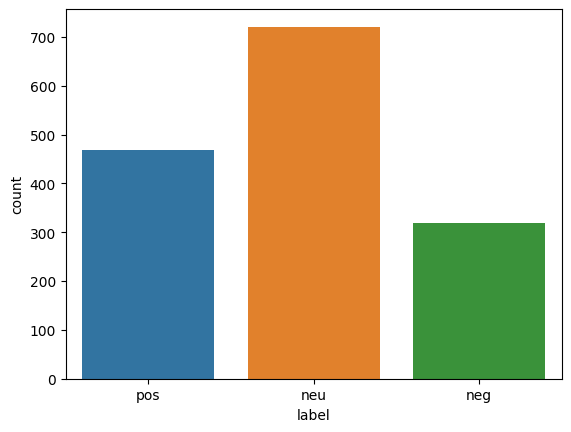

In [ ]:
sns.countplot( x = 'label', data = df );

In [ ]:
# Encode the labels
le = LabelEncoder()
le.fit(df['label'])
df['encoded_label'] = le.transform(df['label'])

In [ ]:
df['text'] = df['text'].apply(normalize)
df['text'] = df['text'].apply(remove_accents)
df['text'] = df['text'].apply(replace_urls)
df['text'] = df['text'].apply(replace_emails)
df['text'] = df['text'].apply(replace_currency_symbols)
df['text'] = df['text']

In [ ]:
from typing import FrozenSet

# Urdu Language Stop words list
STOP_WORDS: FrozenSet[str] = frozenset("""
 آ آئی آئیں آئے آتا آتی آتے آس آمدید آنا آنسہ آنی آنے آپ آگے آہ آہا آیا اب ابھی ابے
 ارے اس اسکا اسکی اسکے اسی اسے اف افوہ البتہ الف ان اندر انکا انکی انکے انہوں انہی انہیں اوئے اور اوپر
 اوہو اپ اپنا اپنوں اپنی اپنے اپنےآپ اکثر اگر اگرچہ اہاہا ایسا ایسی ایسے ایک بائیں بار بارے بالکل باوجود باہر
 بج بجے بخیر بشرطیکہ بعد بعض بغیر بلکہ بن بنا بناؤ بند بڑی بھر بھریں بھی بہت بہتر تاکہ تاہم تب تجھ
 تجھی تجھے ترا تری تلک تم تمام تمہارا تمہاروں تمہاری تمہارے تمہیں تو تک تھا تھی تھیں تھے تیرا تیری تیرے
 جا جاؤ جائیں جائے جاتا جاتی جاتے جانی جانے جب جبکہ جدھر جس جسے جن جناب جنہوں جنہیں جو جہاں جی جیسا
 جیسوں جیسی جیسے حالانکہ حالاں حصہ حضرت خاطر خالی خواہ خوب خود دائیں درمیان دریں دو دوران دوسرا دوسروں دوسری دوں
 دکھائیں دی دیئے دیا دیتا دیتی دیتے دیر دینا دینی دینے دیکھو دیں دیے دے ذریعے رکھا رکھتا رکھتی رکھتے رکھنا رکھنی
 رکھنے رکھو رکھی رکھے رہ رہا رہتا رہتی رہتے رہنا رہنی رہنے رہو رہی رہیں رہے ساتھ سامنے ساڑھے سب سبھی
 سراسر سمیت سوا سوائے سکا سکتا سکتے سہ سہی سی سے شاید شکریہ صاحب صاحبہ صرف ضرور طرح طرف طور علاوہ عین
 فقط فلاں فی قبل قطا لئے لائی لائے لاتا لاتی لاتے لانا لانی لانے لایا لو لوجی لوگوں لگ لگا لگتا
 لگتی لگی لگیں لگے لہذا لی لیا لیتا لیتی لیتے لیکن لیں لیے لے ماسوا مت مجھ مجھی مجھے محترم محترمہ محض
 مرا مرحبا مری مرے مزید مس مسز مسٹر مطابق مل مکرمی مگر مگھر مہربانی میرا میروں میری میرے میں نا نزدیک
 نما نہ نہیں نیز نیچے نے و وار واسطے واقعی والا والوں والی والے واہ وجہ ورنہ وغیرہ ولے وگرنہ وہ وہاں
 وہی وہیں ویسا ویسے ویں پاس پایا پر پس پلیز پون پونی پونے پھر پہ پہلا پہلی پہلے پیر پیچھے چاہئے
 چاہتے چاہیئے چاہے چلا چلو چلیں چلے چناچہ چند چونکہ چکی چکیں چکے ڈالنا ڈالنی ڈالنے ڈالے کئے کا کاش کب کبھی
 کدھر کر کرتا کرتی کرتے کرم کرنا کرنے کرو کریں کرے کس کسی کسے کم کن کنہیں کو کوئی کون کونسا
 کونسے کچھ کہ کہا کہاں کہہ کہی کہیں کہے کی کیا کیسا کیسے کیونکر کیونکہ کیوں کیے کے گئی گئے گا گنا
 گو گویا گی گیا ہائیں ہائے ہاں ہر ہرچند ہرگز ہم ہمارا ہماری ہمارے ہمی ہمیں ہو ہوئی ہوئیں ہوئے ہوا
 ہوبہو ہوتا ہوتی ہوتیں ہوتے ہونا ہونگے ہونی ہونے ہوں ہی ہیلو ہیں ہے یا یات یعنی یک یہ یہاں یہی یہیں
""".split())


def remove_stopwords(text: str):
    return " ".join(word for word in text.split() if word not in STOP_WORDS)

In [ ]:
len(STOP_WORDS)

430

In [ ]:
df[['text']].head(3)

,text
0,بھنڈی بنائی تھی بہت اچھی بنی تھ
1,آہاں نائس بارکان ویسے اس موسم میں بھنڈی
2,سوری ہمارے لیے موسم کوئی معنے رکھتے لوکیشن اہم...


In [ ]:
from urduhack.models.lemmatizer import lemmatizer
def lemitizeStr(str):
    lemme_str = ""
    temp = lemmatizer.lemma_lookup(str)
    for t in temp:
        lemme_str += t[0] + " "

    return lemme_str

In [ ]:
df['lemmatized_text'] = df['text'].apply(lemitizeStr)

In [ ]:
df['text'] =  df['text'].apply(remove_stopwords)

In [ ]:
df['text'][2], df['lemmatized_text'][2]

('سوری موسم معنے لوکیشن اہم',
 'سوری ہمارے لیے موسم کوئی معنے رکھتے لوکیشن اہم ہوتی ہے ')

In [ ]:
df[['text', 'lemmatized_text']].head(3)

,text,lemmatized_text
0,بھنڈی بنائی اچھی بنی تھ,بھنڈی بنائی تھی بہت اچھی بنی تھ
1,آہاں نائس بارکان موسم بھنڈی,آہاں نائس بارکان ویسے اس موسم میں بھنڈی
2,سوری موسم معنے لوکیشن اہم,سوری ہمارے لیے موسم کوئی معنے رکھتے لوکیشن اہم...


In [ ]:
df.head(3)

,text,label,encoded_label,lemmatized_text
0,بھنڈی بنائی اچھی بنی تھ,pos,2,بھنڈی بنائی تھی بہت اچھی بنی تھ
1,آہاں نائس بارکان موسم بھنڈی,pos,2,آہاں نائس بارکان ویسے اس موسم میں بھنڈی
2,سوری موسم معنے لوکیشن اہم,neu,1,سوری ہمارے لیے موسم کوئی معنے رکھتے لوکیشن اہم...


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report

# Define your text and label columns
text_column = 'text'
label_column = 'label'  # Replace with your label column name if applicable

# Split the dataset into training and validation sets (80% train, 20% validation)
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize the text data
max_words = 10000  # Maximum number of words in your vocabulary
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_df[text_column])

X_train = tokenizer.texts_to_sequences(train_df[text_column])
X_val = tokenizer.texts_to_sequences(val_df[text_column])

# Padding sequences to have the same length
max_sequence_length = 200  # Adjust this based on your data and task
X_train = pad_sequences(X_train, maxlen=max_sequence_length, padding='post')
X_val = pad_sequences(X_val, maxlen=max_sequence_length, padding='post')

# Encode labels
label_encoder = LabelEncoder()
label_encoder.fit(train_df[label_column])
y_train = label_encoder.transform(train_df[label_column])
y_val = label_encoder.transform(val_df[label_column])

# Convert labels to categorical format
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

# Build the CNN model
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_sequence_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the CNN model
batch_size = 64
epochs = 12

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

# Evaluate the CNN model
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

accuracy = accuracy_score(y_true, y_pred_classes)
classification_rep = classification_report(y_true, y_pred_classes)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 200, 100)          1000000   
                                                                 
 conv1d_4 (Conv1D)           (None, 196, 128)          64128     
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 39, 128)           0         
 g1D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 4992)              0         
                                                                 
 dense_13 (Dense)            (None, 128)               639104    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                      

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report

# Define your text and label columns
text_column = 'text'
label_column = 'label'  # Replace with your label column name if applicable

# Split the dataset into training and validation sets (80% train, 20% validation)
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize the text data
max_words = 10000  # Maximum number of words in your vocabulary
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_df[text_column])

X_train = tokenizer.texts_to_sequences(train_df[text_column])
X_val = tokenizer.texts_to_sequences(val_df[text_column])

# Padding sequences to have the same length
max_sequence_length = 200  # Adjust this based on your data and task
X_train = pad_sequences(X_train, maxlen=max_sequence_length, padding='post')
X_val = pad_sequences(X_val, maxlen=max_sequence_length, padding='post')

# Encode labels
label_encoder = LabelEncoder()
label_encoder.fit(train_df[label_column])
y_train = label_encoder.transform(train_df[label_column])
y_val = label_encoder.transform(val_df[label_column])

# Convert labels to categorical format
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

# Build the Bi-LSTM model
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_sequence_length))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
# Train the Bi-LSTM model
batch_size = 64
epochs = 15

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

# Evaluate the Bi-LSTM model
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

accuracy = accuracy_score(y_true, y_pred_classes)
classification_rep = classification_report(y_true, y_pred_classes)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 200, 100)          1000000   
                                                                 
 bidirectional_6 (Bidirecti  (None, 200, 256)          234496    
 onal)                                                           
                                                                 
 bidirectional_7 (Bidirecti  (None, 128)               164352    
 onal)                                                           
                                                                 
 dense_15 (Dense)            (None, 3)                 387       
                                                                 
Total params: 1399235 (5.34 MB)
Trainable params: 1399235 (5.34 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15
19/1